In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("C:/Users/SAMSUNG/Desktop/example"))

['bill_authentication.csv', 'chopstick-effectiveness.csv', 'dataset.txt']


In [2]:
dataset = pd.read_csv("C:/Users/SAMSUNG/Desktop/example/bill_authentication.csv")

In [3]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.shape

(1372, 5)

In [5]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[156   0]
 [  4 115]]


In [9]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       156
          1       1.00      0.97      0.98       119

avg / total       0.99      0.99      0.99       275



In [10]:
predicted_values = y_pred
predicted_values

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

학습된 모델을 test 데이터로 테스트해본 뒤, accuracy를 구해본다.

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = classifier.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.99


여기까지 의사결정트리의 학습이 훌륭하게 수행되었다.
하지만 트리의 장점은 역시 학습 모델을 시각화하여 볼 수 있다는 점이다.
python-jupyter에서 역시 아름다운 모습으로 트리의 시각화를 볼 수 있다.

이 과정을 하기 전에, graphviz라는 것을 설치해줘야 한다. mac의 경우 homebrew를 사용하여 간단하게 설치가 가능하고, 윈도우의 경우 공식 다운로드 페이지에서 다운로드를 받은 뒤, 환경 변수를 간단하게 설정해준다.

http://yamalab.tistory.com/31

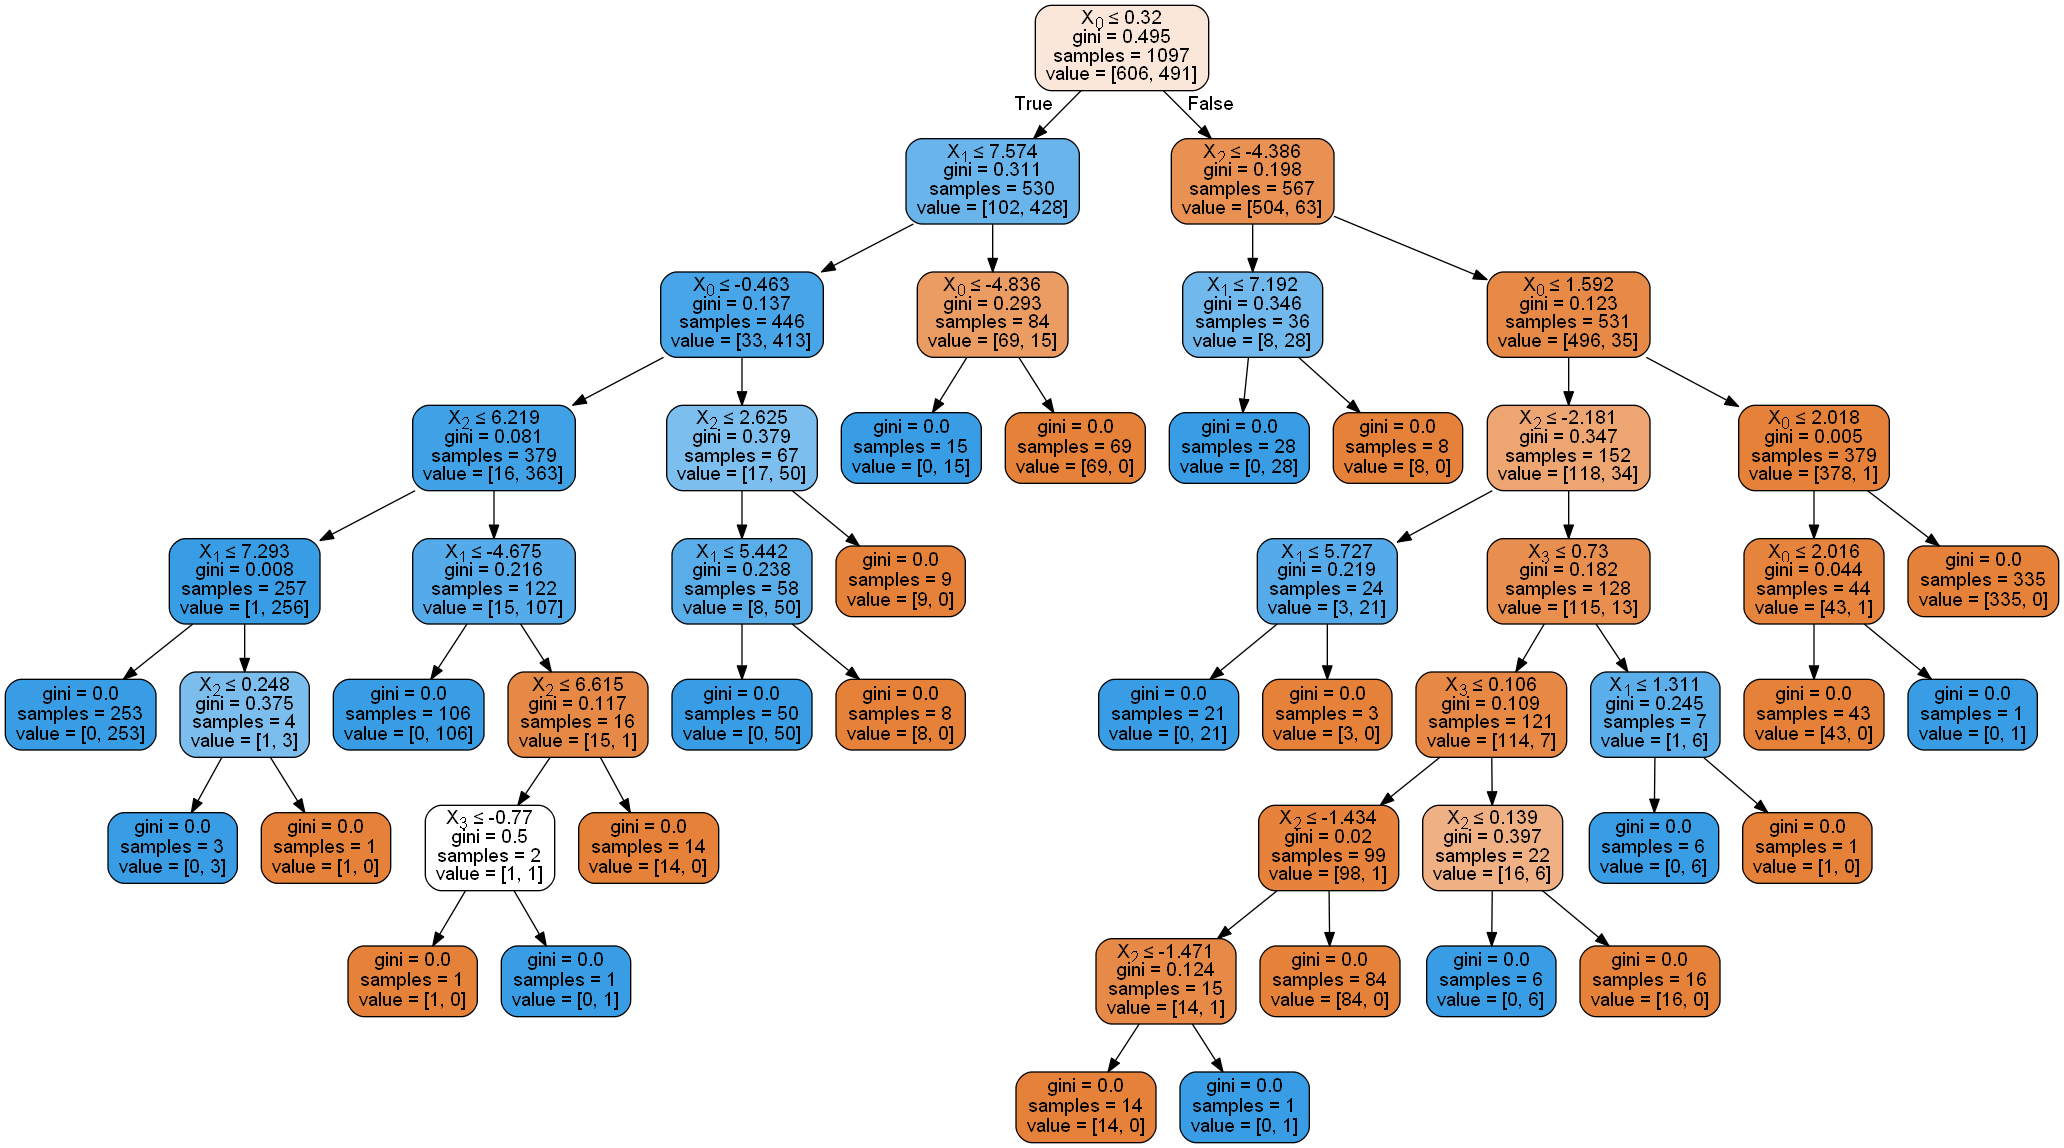

In [12]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
my_submission = pd.DataFrame( {"Actual_value" : y_test[0:], "predicted_values" : predicted_values })

my_submission.to_csv('submission.csv', index=False)

In [14]:
a = pd.read_csv("C:/Users/SAMSUNG/submission.csv")

In [15]:
a.head()

,Actual_value,predicted_values
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
